In [1]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
file_folder = '/home/anna/annaCode/UiO/MEK4350/notebooks/Data_undervisning200923'
date_format = '%m/%d/%Y %H:%M:%S.%f'

df_list = []
for i in range(1,5):
    file_path =  os.path.join(file_folder, f"proberun{i}_tett.csv")
    df = pd.read_csv(file_path, names = ['date_string', 'probe_1_raw', 'probe_2_raw', 'probe_3_raw', 'probe_4_raw', 'sensors'])
    # convert data from string to datatime format
    df['date_time'] = pd.to_datetime(df['date_string'], format=date_format)
    # calculate elapsed time [in seconds] since  begining of the experiment
    df['elapsed_secs'] =  (df['date_time'] - df.at[0, 'date_time']).dt.total_seconds()
    #calculate amplitudes; raw columns oryginaly contain vertical distance from utrasound probe, covert it distance from water level 
    df['probe_1'] = df['probe_1_raw'].mean() - df['probe_1_raw']
    df['probe_2'] = df['probe_2_raw'].mean() - df['probe_2_raw']
    df['probe_3'] = df['probe_3_raw'].mean() - df['probe_3_raw']
    df['probe_4'] = df['probe_4_raw'].mean() - df['probe_4_raw']
    df_list.append(df)
    
df = df_list[0]
df.head(2)

,date_string,probe_1_raw,probe_2_raw,probe_3_raw,probe_4_raw,sensors,date_time,elapsed_secs,probe_1,probe_2,probe_3,probe_4
0,09/20/2023 08:42:24.832,0.10401,0.10358,0.10444,0.10367,343.87,2023-09-20 08:42:24.832,0.000,-0.000255,-0.000142,-0.000671,0.000152
1,09/20/2023 08:42:24.836,0.10410,0.10358,0.10444,0.10367,343.87,2023-09-20 08:42:24.836,0.004,-0.000345,-0.000142,-0.000671,0.000152


In [3]:
real_distances = np.array([6.98, 8.155, 12.325, 16.995])
y_axis_labels = [f'probe {i+1} - {real_distances[i]}' for i in range(4)]


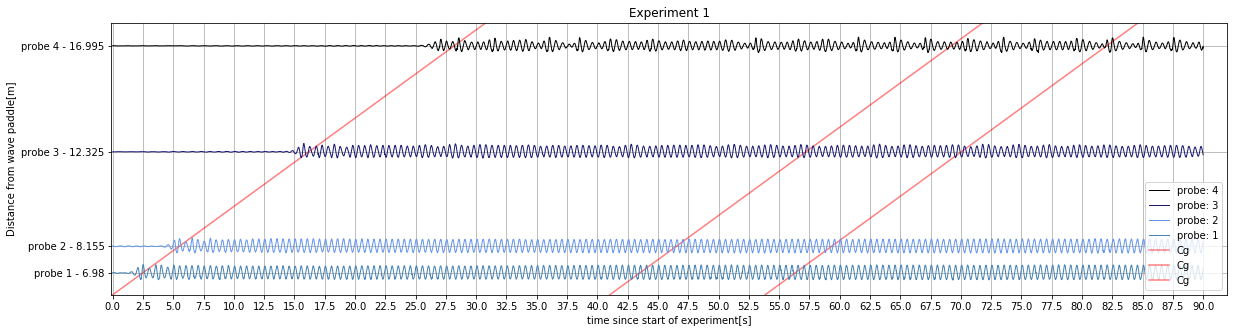

In [4]:

fig, ax = plt.subplots(figsize=(20, 5))
colors = ['steelblue', 'cornflowerblue', 'midnightblue', 'black']

cg = 0.39
scale_factor = 20
ax.grid()
ax.locator_params(axis='x', nbins=40) 
ax.set_ylim(6,18)
ax.set_xlim(-0.1,92)

ax.set_yticks(real_distances)
ax.set_yticklabels(y_axis_labels)
 
ax.plot(df.elapsed_secs.values, [cg * x + 6 for x in df.elapsed_secs.values], color='red', alpha = 0.5, label = 'Cg' )
ax.plot(df.elapsed_secs.values, [cg * x -10 for x in df.elapsed_secs.values], color='red', alpha = 0.5, label = 'Cg' )
ax.plot(df.elapsed_secs.values, [cg * x -15 for x in df.elapsed_secs.values], color='red', alpha = 0.5, label = 'Cg' )


for i in range(0,4):
    ax.plot(df.elapsed_secs.values,  df[f'probe_{i+1}'].values * scale_factor + real_distances[i],
          color = colors[i], linewidth=1, label =f'probe: {i+1}')

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]; labels = labels[::-1]
plt.xlabel('time since start of experiment[s]')
plt.ylabel('Distance from wave paddle[m]')
plt.legend(handles, labels, loc='lower right')  
_ = plt.title(f'Experiment {1}')


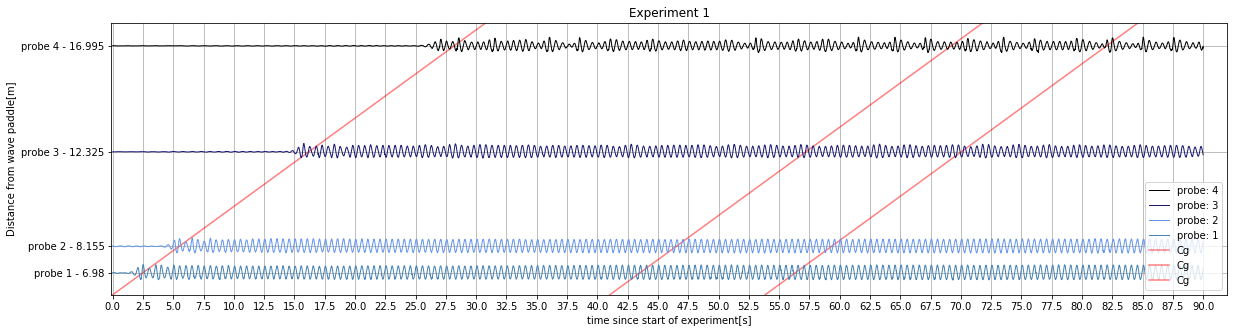

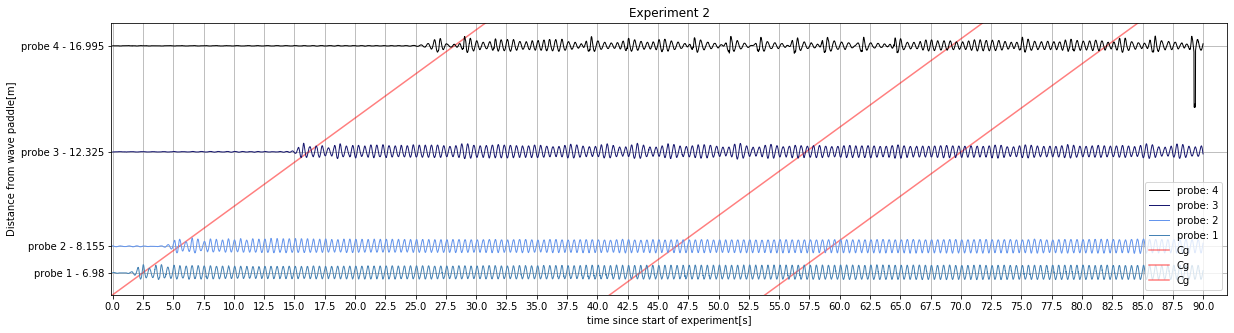

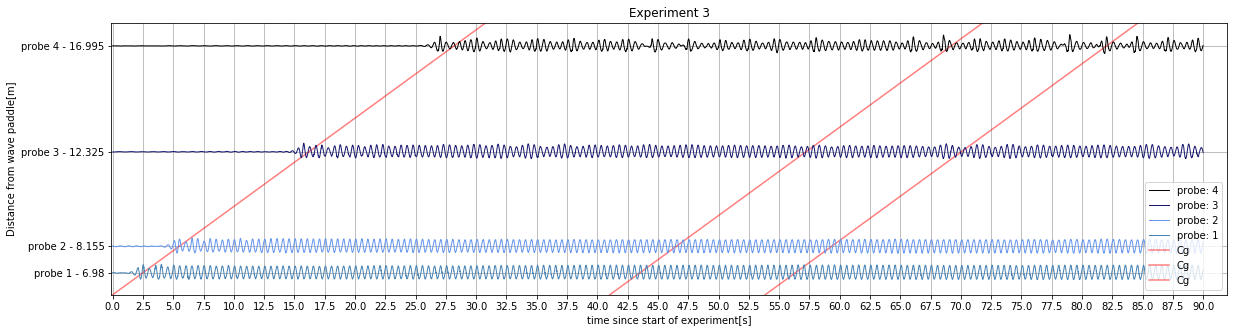

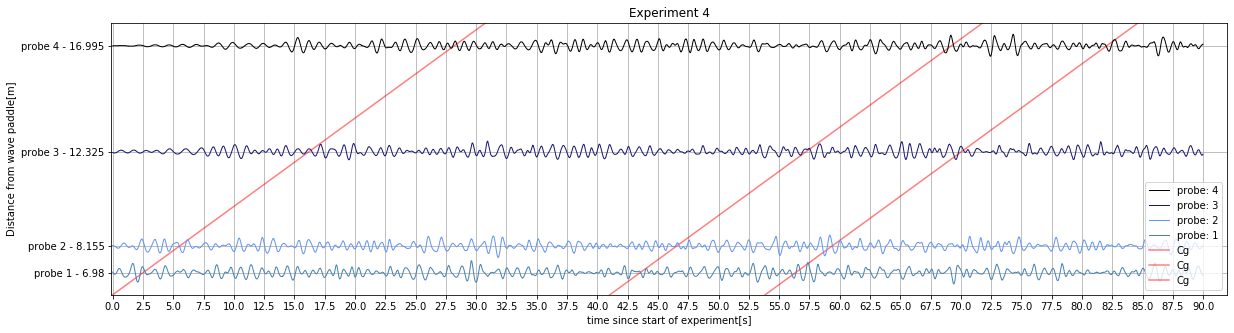

In [5]:
def plot_with_cg(experiment_number, df):
    fig, ax = plt.subplots(figsize=(20, 5))
    colors = ['steelblue', 'cornflowerblue', 'midnightblue', 'black']

    cg = 0.39
    scale_factor = 20
    ax.grid()
    ax.locator_params(axis='x', nbins=40) 
    ax.set_ylim(6,18)
    ax.set_xlim(-0.1,92)

    ax.set_yticks(real_distances)
    ax.set_yticklabels(y_axis_labels)

    ax.plot(df.elapsed_secs.values, [cg * x + 6 for x in df.elapsed_secs.values], color='red', alpha = 0.5, label = 'Cg' )
    ax.plot(df.elapsed_secs.values, [cg * x -10 for x in df.elapsed_secs.values], color='red', alpha = 0.5, label = 'Cg' )
    ax.plot(df.elapsed_secs.values, [cg * x -15 for x in df.elapsed_secs.values], color='red', alpha = 0.5, label = 'Cg' )

 
    for i in range(0,4):
        ax.plot(df.elapsed_secs.values,  df[f'probe_{i+1}'].values * scale_factor + real_distances[i],
              color = colors[i], linewidth=1, label =f'probe: {i+1}')

    handles, labels = plt.gca().get_legend_handles_labels()
    handles = handles[::-1]; labels = labels[::-1]
    plt.xlabel('time since start of experiment[s]')
    plt.ylabel('Distance from wave paddle[m]')
    plt.legend(handles, labels, loc='lower right')  
    _ = plt.title(f'Experiment {experiment_number + 1}')
    
for i, df in enumerate (df_list):
    plot_with_cg(i, df)